In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import functions as fn

In [12]:
path_test = "../PANOCOS2"
path_results  = "../results_images"
cameras = 4
cam_width = 1280
cam_hight = 1024
cameras_name = {"0":"0", "1":"1", "2":"1", "3":"0"}
num_image = 20

In [3]:
images=[]
for cam in range(cameras):
    images.append(cv.imread(path_test + "/camera_" + str(cam) + "/camera_" + cameras_name[str(cam)]+ "_image_%06d"% num_image + ".bmp", 0))

In [4]:
cam_coord = np.zeros((cameras, 4), dtype=np.int32)
G_list = []

In [5]:
cam = 0

G_list.append(np.array([[1., 0., 0.],[0., 1., 0.]]))
cam_coord[cam][2:] = images[cam].shape[:2][::-1]
cam_coord

array([[   0,    0, 1280, 1024],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]], dtype=int32)

In [6]:
cam = 1
H = fn.homografy(images[cam-1], images[cam])
G, dim = fn.rotate_and_cut(images[cam], H)
images[cam] = cv.warpAffine(images[cam], G, dim)

G_list.append(G)

cam_coord[cam][ :2] = cam_coord[cam-1][:2] + H[:,2] - G[:,2]
cam_coord[cam][2:] = images[cam].shape[:2][::-1]
cam_coord



array([[   0,    0, 1280, 1024],
       [1141,  184, 1255,  997],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0]], dtype=int32)

In [7]:
cam = 2
H = fn.homografy(images[cam-1], images[cam])
G, dim = fn.rotate_and_cut(images[cam], H)
images[cam] = cv.warpAffine(images[cam], G, dim)

G_list.append(G)

cam_coord[cam][ :2] = cam_coord[cam-1][:2] + H[:,2] - G[:,2]
cam_coord[cam][2:] = images[cam].shape[:2][::-1]
cam_coord

array([[   0,    0, 1280, 1024],
       [1141,  184, 1255,  997],
       [2213,  232, 1212,  949],
       [   0,    0,    0,    0]], dtype=int32)

In [8]:
cam = 3
H = fn.homografy(images[cam-1], images[cam])
G, dim = fn.rotate_and_cut(images[cam], H)
images[cam] = cv.warpAffine(images[cam], G, dim)

G_list.append(G)

cam_coord[cam][ :2] = cam_coord[cam-1][:2] + H[:,2] - G[:,2]
cam_coord[cam][2:] = images[cam].shape[:2][::-1]
cam_coord

array([[   0,    0, 1280, 1024],
       [1141,  184, 1255,  997],
       [2213,  232, 1212,  949],
       [2907,  119, 1182,  925]], dtype=int32)

In [9]:
cam_coord[:, 0] += np.abs(np.min(cam_coord[:, 0]))
cam_coord[:, 1] += np.abs(np.min(cam_coord[:, 1]))
cam_coord

array([[   0,    0, 1280, 1024],
       [1141,  184, 1255,  997],
       [2213,  232, 1212,  949],
       [2907,  119, 1182,  925]], dtype=int32)

In [10]:
display = fn.stich_images(cam_coord, images, defolt_color = 0)

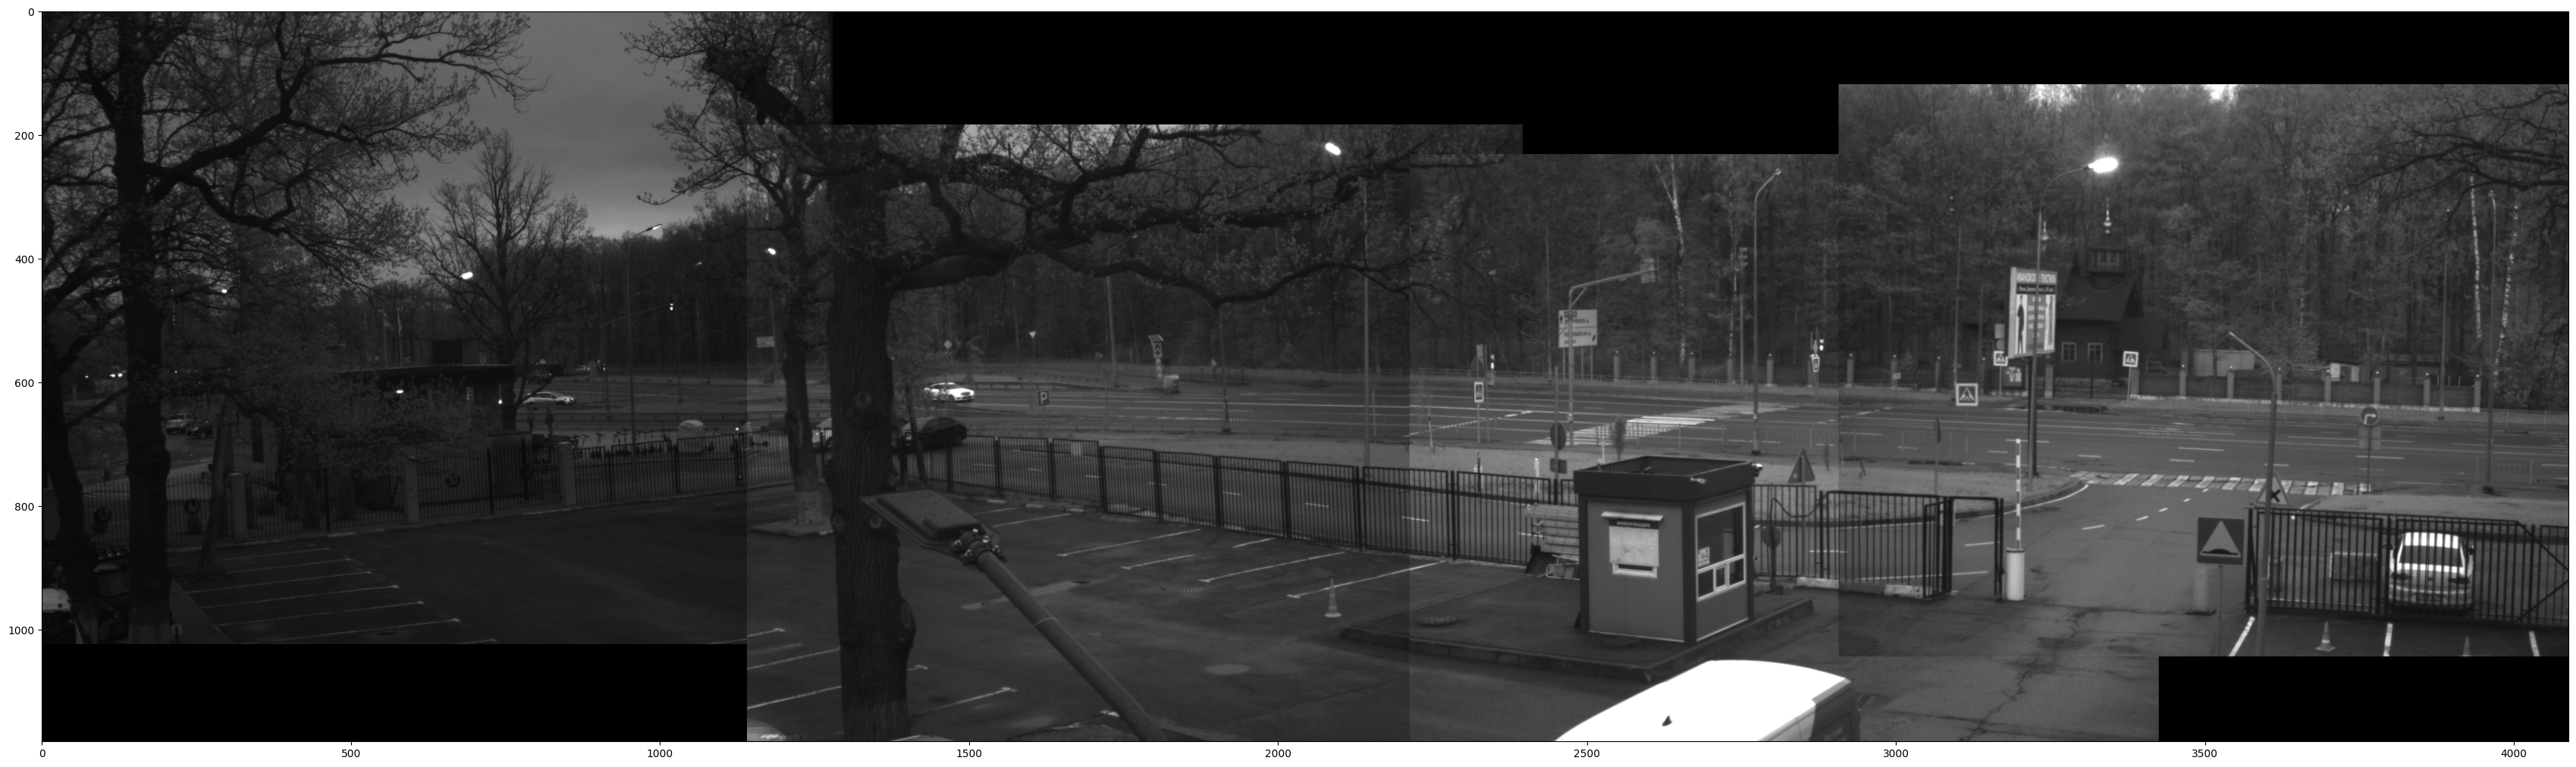

In [11]:
fn.im_show(display, gray = 'gray')

In [13]:
cv.imwrite(path_results + "/rotate_and_cut.jpg", display)

True